In [1]:
import seaborn as sns
import pandas as pd

In [2]:
#From sns we load tips 
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [5]:
#Above line can also be written as
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [6]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [8]:
#Best way to write above line is 
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

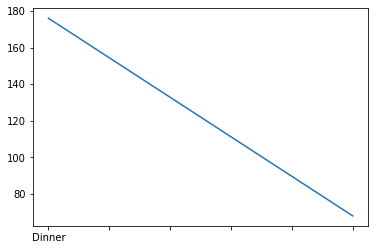

In [9]:
#To plot a graph
tips.time.value_counts().plot()

<AxesSubplot:>

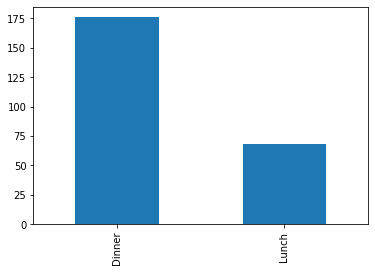

In [10]:
#To plot bar graph for better visulization
#Above graph is hard to visualize for dinner and lunch
# tips.time.value_counts().plot(kind='bar')
tips.time.value_counts().plot.bar()

In [11]:
# Proportion of observation in %
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

<AxesSubplot:xlabel='time'>

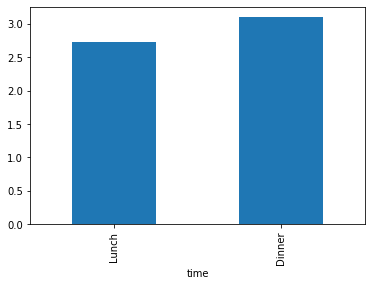

In [12]:
#Group by time present by tip and find mean of tips give based on time 
tips.groupby(['time'])['tip'].mean().plot.bar()

In [13]:
#To create table
# unstack() - To make a pivot structure
tips.groupby(['smoker','sex','day','size'])['tip'].mean().unstack()

size                   1         2         3         4     5    6
smoker sex    day                                                
Yes    Male   Thur   NaN  2.822500  4.000000  4.000000   NaN  NaN
              Fri   1.92  2.546667       NaN  4.730000   NaN  NaN
              Sat    NaN  2.318235  4.602500  3.384000  3.00  NaN
              Sun    NaN  3.314000  3.750000  5.090000  2.00  NaN
       Female Thur   NaN  2.540000  3.230000  5.000000   NaN  NaN
              Fri    NaN  2.682857       NaN       NaN   NaN  NaN
              Sat   1.00  2.721818  4.500000  3.090000   NaN  NaN
              Sun    NaN  3.500000  3.500000       NaN   NaN  NaN
No     Male   Thur   NaN  2.559375  2.180000  4.000000  5.00  6.7
              Fri    NaN  2.500000       NaN       NaN   NaN  NaN
              Sat    NaN  2.520588  3.356667  5.191667   NaN  NaN
              Sun    NaN  2.590000  3.020000  3.820000  5.00  5.0
       Female Thur  1.83  2.158421  1.360000  4.045000   NaN  4.6
              Fri    NaN  3.250000  3.000000       NaN   NaN  NaN
              Sat   1.00  2.653750  3.580000  2.450000   NaN  NaN
              Sun    NaN  2.548000  2.792500  4.390000  5.14  NaN

In [14]:
#New column to find % of tip compared to total bill
tips['tip-pot'] = tips.tip / tips.total_bill

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip-pot
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

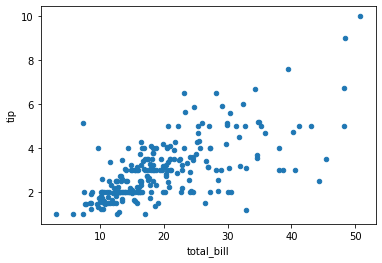

In [16]:
# Above analysis on pct_tip to visualize relationship bw total_bill & tip
tips.plot.scatter(x='total_bill',y='tip')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

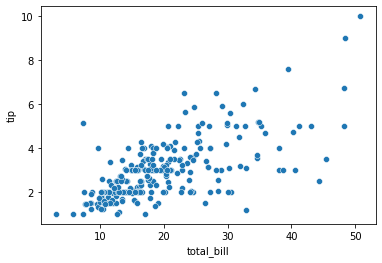

In [17]:
# Visualizing this time using sns library
# sns library provides advanced visulization using borders 
sns.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

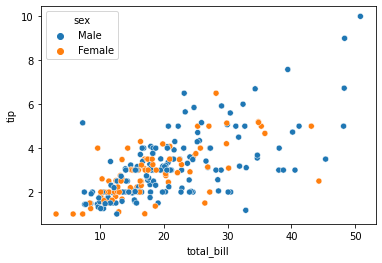

In [18]:
# Adding effects of column sex to understand better
sns.scatterplot(x='total_bill',y='tip',data=tips, hue='sex')

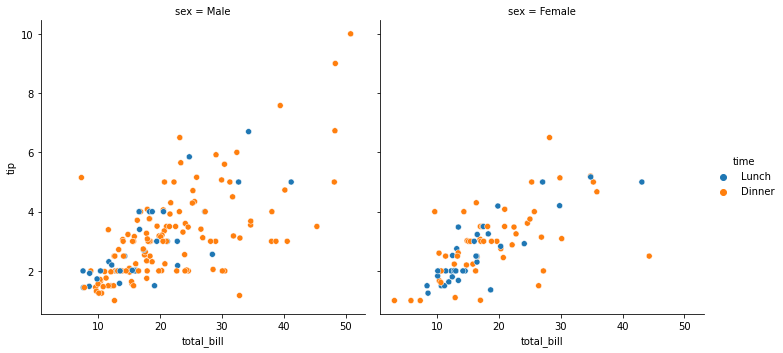

In [19]:
# Seperating male & female into columns
sns.relplot(x='total_bill',y='tip',data=tips, 
            col='sex', hue='time')

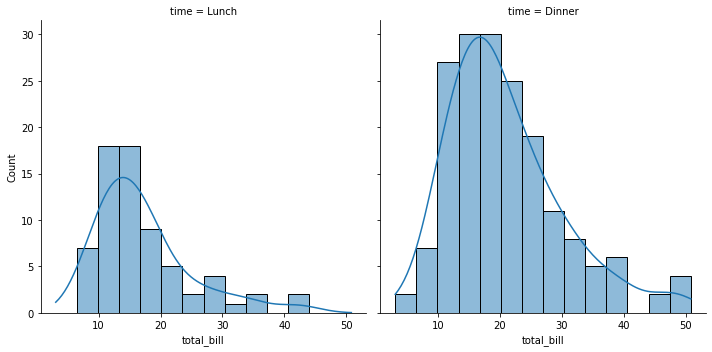

In [20]:
#Distribution of total_bill by time
# kde=True - Display blue line to understand exact Histrogram Tail better
sns.displot(data=tips, x='total_bill', col='time', kde=True)

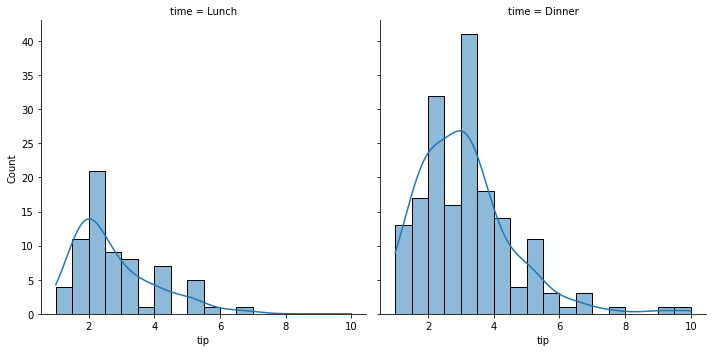

In [21]:
# Clearly people pay more bill during dinner
sns.displot(data=tips, x='tip', col='time', kde=True)

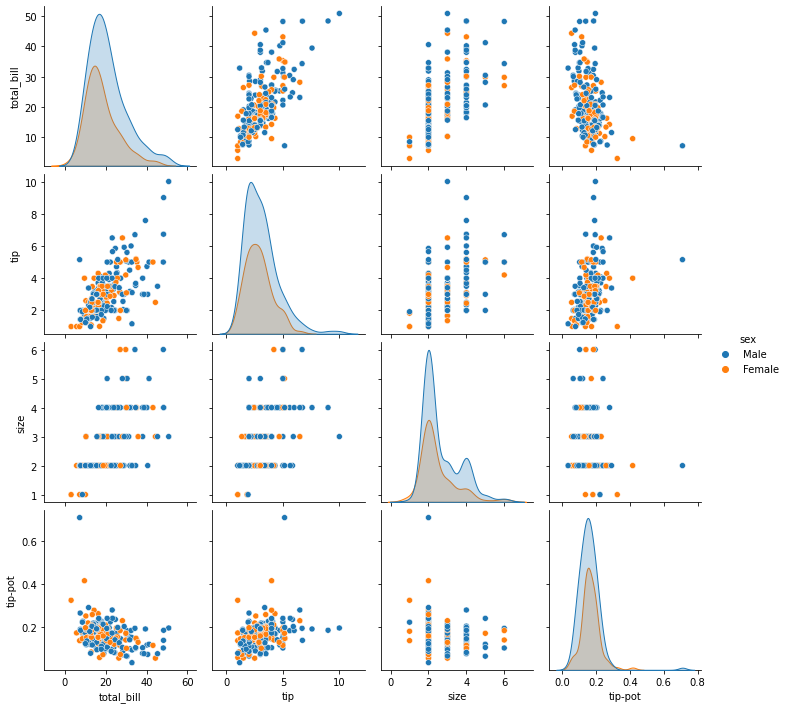

In [22]:
# Correlation and distribution for all numeric-variables(both axes) by sex
sns.pairplot(data=tips, hue='sex')